In [45]:
!pip install spacy

In [46]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 558.5 kB/s eta 0:00:23
     --------------------------------------- 0.1/12.8 MB 558.5 kB/s eta 0:00:23
     --------------------------------------- 0.1/12.8 MB 558.5 kB/s eta 0:00:23
     --------------------------------------- 0.1/12.8 MB 392.2 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 392.2 kB/s eta 0:00:33
     --------------------------------------- 0.2/12.8 MB 416.7 kB/s eta 0:00:31
     --------------------------------------- 0.2/12.8 MB 416.7 kB/s eta 0:00:31
     --------------------------------------- 0.2/12.8 MB 416.7 kB/s eta 0:00:31
     --------------------------------------- 0.2/12.8 MB 416.7 kB/s eta 0:00:31
     --------------------------------------- 0.2/12.8 MB

In [47]:
!pip install beautifulsoup4

In [48]:
!pip install textblob

In [49]:
!pip install mlxtend

In [50]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\nadee\appdata\local\temp\pip-req-build-ga29pzan
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7665 sha256=baf014c68c82afbe54c1bed9ace80210e0b924da3390c087a11bd821f1618251
  Stored in directory: C:\Users\nadee\AppData\Local\Temp\pip-ephem-wheel-cache-52k7_6i0\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.1.3
    Uninstalling preprocess_kgptalkie-0.1.3:
      Successfully uninstalled preprocess_kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\nadee\AppData\Local\Temp\pip-req-build-ga29pzan'


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [52]:
df = pd.read_csv("E:/Portfolio/Projects/NLP/IMDB_Sentiment_Classification_Application_with_Streamlit/IMDB-Dataset.csv")

In [53]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [54]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Preprocessing

In [55]:
df['word_count']=df['review'].apply(lambda x: ps.get_wordcounts(x))
df['char_count']=df['review'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength']=df['review'].apply(lambda x: ps.get_avg_wordlength(x))

In [56]:
from bs4 import BeautifulSoup

def remove_html_tags(x):
    return BeautifulSoup(x, 'html.parser').get_text().strip()

df['review'] = df['review'].apply(lambda x: remove_html_tags(x))
df['review'] = df['review'].str.lower()


C:\Users\nadee\AppData\Local\Temp\ipykernel_21240\3146658960.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'html.parser').get_text().strip()


In [57]:
#df['review']=df['review'].apply(lambda x: ps.remove_html_tags(x))
#df['review']=df['review'].str.lower()

In [58]:
df.head()

,review,sentiment,word_count,char_count,avg_wordlength
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414
1,a wonderful little production. the filming tec...,positive,162,837,5.166667
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337
3,basically there's a family where a little boy ...,negative,138,611,4.427536
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435


In [59]:
df['review_without_stopwords']=df['review'].apply(lambda x: ps.remove_stopwords(x))

In [60]:
df.head()


,review,sentiment,word_count,char_count,avg_wordlength,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,"petter mattei's ""love time money"" visually stu..."


In [61]:
!pip install seaborn
import seaborn as sns

In [62]:
df.columns

Index(['review', 'sentiment', 'word_count', 'char_count', 'avg_wordlength',
       'review_without_stopwords'],
      dtype='object')

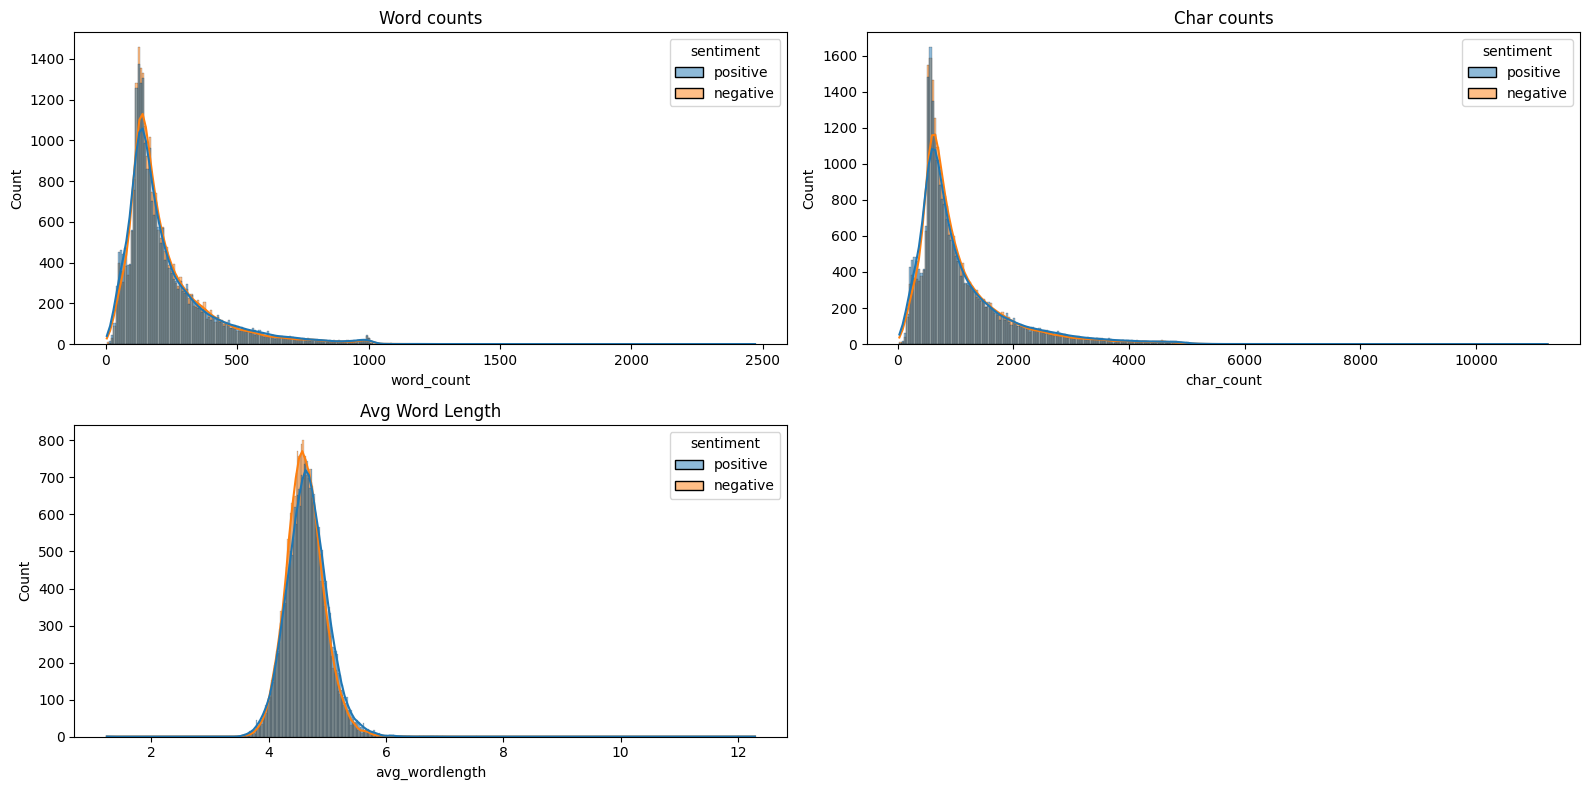

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(data=df, x='word_count', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_count', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')


plt.tight_layout()
plt.show()


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [76]:
X_train.shape, X_test.shape


((40000,), (10000,))

In [77]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [79]:
clf.fit(X_train,y_train)

D:\Anaconda\envs\spacy_env\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

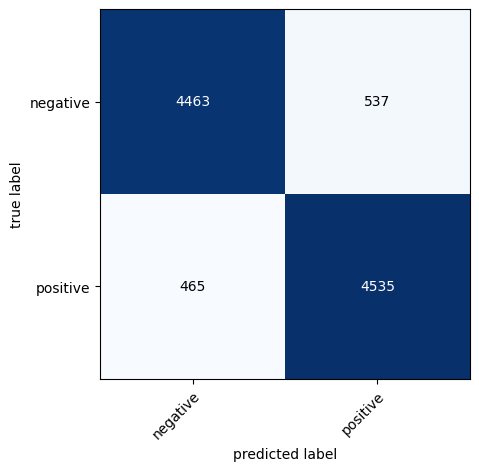

In [82]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [83]:
clf.predict(['Wow, this is amazing lesson'])

array(['positive'], dtype=object)

In [84]:
clf.predict(['oh, this is boring class'])

array(['negative'], dtype=object)

In [85]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))